In [96]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # import the random forest model
from sklearn import  preprocessing # used for label encoding and imputing NaNs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import datetime as dt # we will need this to convert the date to a number of days since some point

from sklearn.tree import export_graphviz
from sklearn import tree

# Acceptance Status will be predicted using 3 models

In [97]:
fare_data = pd.read_csv("train.csv")
fare_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [98]:
#import the times for pickup_time, drop_time
fare_data = pd.read_csv("train.csv", parse_dates=['pickup_time', 'drop_time'])
fare_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [99]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
fare_data.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64


In [100]:
fare_data['pickup_time_only'] = fare_data['pickup_time'].dt.time
fare_data['drop_time_only'] = fare_data['drop_time'].dt.time

In [101]:
fare_data = fare_data.fillna(0)
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
fare_data.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
pickup_time_only             0
drop_time_only               0
dtype: int64


this time all nan values replaced by 0 because those fields can be zero

In [102]:
from sklearn.preprocessing import LabelEncoder
lb_label = LabelEncoder()
fare_data["pickup_time_only_code"] = lb_label.fit_transform(fare_data["pickup_time_only"])
fare_data["drop_time_only_code"] = lb_label.fit_transform(fare_data["drop_time_only"])
fare_data[["pickup_time_only", "pickup_time_only_code", "drop_time_only", "drop_time_only_code"]].head(11)

,pickup_time_only,pickup_time_only_code,drop_time_only,drop_time_only_code
0,00:20:00,19,00:34:00,34
1,00:56:00,52,01:09:00,69
2,01:08:00,62,01:26:00,81
3,02:27:00,118,02:37:00,133
4,03:34:00,163,03:51:00,179
5,05:38:00,239,06:35:00,293
6,06:29:00,287,06:49:00,307
7,06:50:00,308,07:12:00,330
8,07:00:00,318,07:06:00,324
9,07:02:00,320,07:28:00,346


In [103]:
#Encoding categorical features
#assign a numeric value to label


In [104]:
fare_data["binary_label"] = np.where(fare_data["label"].str.contains("incorrect"), 0,1)

In [105]:
#categorical data preprocess done
fare_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup_time_only,drop_time_only,pickup_time_only_code,drop_time_only_code,binary_label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,00:20:00,00:34:00,19,34,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,00:56:00,01:09:00,52,69,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,01:08:00,01:26:00,62,81,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,02:27:00,02:37:00,118,133,1
4,189128020,0.0,0.0,0.0,0.0000,0.0,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct,03:34:00,03:51:00,163,179,1


In [106]:
#remove unwanted columns
X_fare_data = fare_data.drop(['tripid', 'pickup_time', 'pickup_time_only', 'drop_time_only', 'drop_time', 'label', 'binary_label'], axis=1)
y_fare_data = fare_data['binary_label']

In [107]:
X_fare_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17176 non-null  float64
 1   duration                   17176 non-null  float64
 2   meter_waiting              17176 non-null  float64
 3   meter_waiting_fare         17176 non-null  float64
 4   meter_waiting_till_pickup  17176 non-null  float64
 5   pick_lat                   17176 non-null  float64
 6   pick_lon                   17176 non-null  float64
 7   drop_lat                   17176 non-null  float64
 8   drop_lon                   17176 non-null  float64
 9   fare                       17176 non-null  float64
 10  pickup_time_only_code      17176 non-null  int32  
 11  drop_time_only_code        17176 non-null  int32  
dtypes: float64(10), int32(2)
memory usage: 1.4 MB


In [108]:
X_fare_data.shape

(17176, 12)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_fare_data, y_fare_data, test_size = 0.20)

In [110]:
X_train.shape

(13740, 12)

In [111]:
X_test.shape

(3436, 12)

In [112]:
#decision tree

In [113]:
model = tree.DecisionTreeClassifier()

In [114]:
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
y_pred = model.predict(X_test)
# Check the training error
model.score(X_test, y_test)

0.9126891734575088

Feature Selection By Gradient Boost Tree for RandomForestClassifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [117]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print ("Classification report: ", classification_report(y_test, y_pred))
    return accuracy_score(y_test,y_pred)

In [118]:
def run_gradientBoostingForest(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print ("Classification report: ", classification_report(y_test, y_pred))
    return accuracy_score(y_test,y_pred)

In [119]:
number_of_features = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracy_random_forest_gradient_boost_RFE = [None,None,None,None,None,None,None,None,None,None,None,None]
accuracy_random_forest_random_forest_RFE = [None,None,None,None,None,None,None,None,None,None,None,None]
accuracy_gradient_boost_gradient_boost_RFE = [None,None,None,None,None,None,None,None,None,None,None,None]
accuracy_decision_tree_decision_tree_RFE = [None,None,None,None,None,None,None,None,None,None,None,None]
accuracy_decision_tree_gradient_boosting_RFE = [None,None,None,None,None,None,None,None,None,None,None,None]

In [120]:
for index in range(1, 13):
    gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = index)
    gradientBoostRFELoop.fit(X_train,y_train)
    X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
    X_test_Grad_RFELoop = gradientBoostRFELoop.transform(X_test)
    print("number of selected features:", index)
    accuracy_random_forest_gradient_boost_RFE[index-1] = run_randomForest(X_train_Grad_RFELoop, X_test_Grad_RFELoop, y_train, y_test)
    print()

number of selected features: 1
Accuracy:  0.8928987194412107
Classification report:                precision    recall  f1-score   support

           0       0.39      0.23      0.29       325
           1       0.92      0.96      0.94      3111

    accuracy                           0.89      3436
   macro avg       0.66      0.60      0.61      3436
weighted avg       0.87      0.89      0.88      3436


number of selected features: 2
Accuracy:  0.9321885913853318
Classification report:                precision    recall  f1-score   support

           0       0.71      0.47      0.57       325
           1       0.95      0.98      0.96      3111

    accuracy                           0.93      3436
   macro avg       0.83      0.73      0.77      3436
weighted avg       0.92      0.93      0.93      3436


number of selected features: 3
Accuracy:  0.9394644935972061
Classification report:                precision    recall  f1-score   support

           0       0.79      0.49 

Gradient Boosting Algorithm for RFE

In [121]:
for index in range (1, 13):
    gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = index)
    gradientBoostRFELoop.fit(X_train,y_train)
    X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
    X_test_Grad_RFELoop = gradientBoostRFELoop.transform(X_test)
    print("number of selected features:", index)
    accuracy_gradient_boost_gradient_boost_RFE[index-1] = run_gradientBoostingForest(X_train_Grad_RFELoop, X_test_Grad_RFELoop, y_train, y_test)
    print()

number of selected features: 1
Accuracy:  0.9129802095459837
Classification report:                precision    recall  f1-score   support

           0       0.63      0.19      0.30       325
           1       0.92      0.99      0.95      3111

    accuracy                           0.91      3436
   macro avg       0.78      0.59      0.63      3436
weighted avg       0.89      0.91      0.89      3436


number of selected features: 2
Accuracy:  0.9353899883585565
Classification report:                precision    recall  f1-score   support

           0       0.86      0.38      0.53       325
           1       0.94      0.99      0.97      3111

    accuracy                           0.94      3436
   macro avg       0.90      0.69      0.75      3436
weighted avg       0.93      0.94      0.92      3436


number of selected features: 3
Accuracy:  0.9388824214202561
Classification report:                precision    recall  f1-score   support

           0       0.88      0.41 

Feature Selection By Random Forest for RandomForestClassifier

In [122]:
for index in range(1, 13):
    randomForestRFELoop = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),n_features_to_select = index)
    randomForestRFELoop.fit(X_train,y_train)
    X_train_RandForest_RFELoop = randomForestRFELoop.transform(X_train)
    X_test_RandForest_RFELoop = randomForestRFELoop.transform(X_test)
    print("selected features:", index)
    accuracy_random_forest_random_forest_RFE[index-1] = run_randomForest(X_train_RandForest_RFELoop, X_test_RandForest_RFELoop, y_train, y_test)
    print()

selected features: 1
Accuracy:  0.8928987194412107
Classification report:                precision    recall  f1-score   support

           0       0.39      0.23      0.29       325
           1       0.92      0.96      0.94      3111

    accuracy                           0.89      3436
   macro avg       0.66      0.60      0.61      3436
weighted avg       0.87      0.89      0.88      3436


selected features: 2
Accuracy:  0.9321885913853318
Classification report:                precision    recall  f1-score   support

           0       0.71      0.47      0.57       325
           1       0.95      0.98      0.96      3111

    accuracy                           0.93      3436
   macro avg       0.83      0.73      0.77      3436
weighted avg       0.92      0.93      0.93      3436


selected features: 3
Accuracy:  0.9394644935972061
Classification report:                precision    recall  f1-score   support

           0       0.79      0.49      0.60       325
          

Feature Selection By DecisionTree for DecisionTreeClassifier

In [123]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Score: ", model.score(X_test, y_test))
    print ("Classification report: ", classification_report(y_test, y_pred))
    return model.score(X_test, y_test)

In [124]:
for index in range(1, 13):
        decisionTreeRFELoop = RFE(tree.DecisionTreeClassifier(max_depth = 5),n_features_to_select = index)
        decisionTreeRFELoop.fit(X_train,y_train)
        X_train_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_train)
        X_test_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_test)
        print("selected features:", index)
        accuracy_decision_tree_decision_tree_RFE[index-1] = run_decisionTree(X_train_DecisionTree_RFELoop, X_test_DecisionTree_RFELoop, y_train, y_test)
        print()

selected features: 1
Score:  0.8786379511059371
Classification report:                precision    recall  f1-score   support

           0       0.31      0.24      0.27       325
           1       0.92      0.95      0.93      3111

    accuracy                           0.88      3436
   macro avg       0.62      0.59      0.60      3436
weighted avg       0.87      0.88      0.87      3436


selected features: 2
Score:  0.9007566938300349
Classification report:                precision    recall  f1-score   support

           0       0.48      0.49      0.48       325
           1       0.95      0.94      0.95      3111

    accuracy                           0.90      3436
   macro avg       0.71      0.72      0.71      3436
weighted avg       0.90      0.90      0.90      3436


selected features: 3
Score:  0.919965075669383
Classification report:                precision    recall  f1-score   support

           0       0.58      0.54      0.56       325
           1       0

In [125]:
for index in range(1, 13):
        decisionTreeRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = index)
        decisionTreeRFELoop.fit(X_train,y_train)
        X_train_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_train)
        X_test_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_test)
        print("selected features:", index)
        accuracy_decision_tree_gradient_boosting_RFE[index-1] = run_decisionTree(X_train_DecisionTree_RFELoop, X_test_DecisionTree_RFELoop, y_train, y_test)
        print()

selected features: 1
Score:  0.8786379511059371
Classification report:                precision    recall  f1-score   support

           0       0.31      0.24      0.27       325
           1       0.92      0.95      0.93      3111

    accuracy                           0.88      3436
   macro avg       0.62      0.59      0.60      3436
weighted avg       0.87      0.88      0.87      3436


selected features: 2
Score:  0.8995925494761351
Classification report:                precision    recall  f1-score   support

           0       0.47      0.50      0.49       325
           1       0.95      0.94      0.94      3111

    accuracy                           0.90      3436
   macro avg       0.71      0.72      0.72      3436
weighted avg       0.90      0.90      0.90      3436


selected features: 3
Score:  0.919965075669383
Classification report:                precision    recall  f1-score   support

           0       0.58      0.55      0.56       325
           1       0

We can clearly see we have higher accuracy with all these classifiers for 4,5,6 feature analysis

Let's compare the accuarcies in a plot


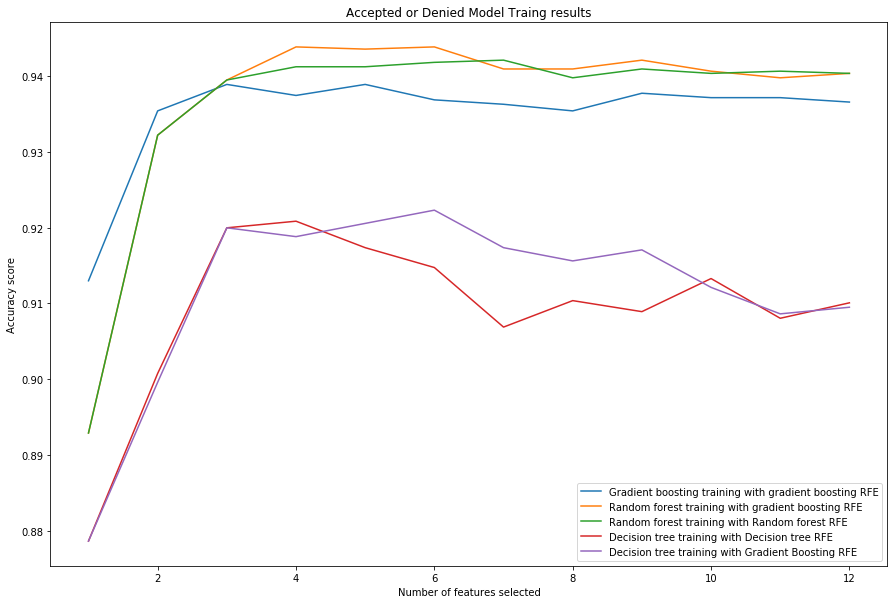

In [126]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

# line 1 points
x1 = number_of_features
y1 = accuracy_gradient_boost_gradient_boost_RFE
# plotting the line 1 points 
plt.plot(x1, y1, label = "Gradient boosting training with gradient boosting RFE")

# line 2 points
x2 = number_of_features
y2 = accuracy_random_forest_gradient_boost_RFE
# plotting the line 1 points 
plt.plot(x2, y2, label = "Random forest training with gradient boosting RFE")


# line 3 points
x3 = number_of_features
y3 = accuracy_random_forest_random_forest_RFE
# plotting the line 2 points 
plt.plot(x3, y3, label = "Random forest training with Random forest RFE")

# line 4 points
x4 = number_of_features
y4 = accuracy_decision_tree_decision_tree_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Decision tree RFE")

# line 5 points
x4 = number_of_features
y4 = accuracy_decision_tree_gradient_boosting_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Gradient Boosting RFE")

plt.xlabel('Number of features selected')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy score')
# Set a title of the current axes.
plt.title('Accepted or Denied Model Traing results')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
fig.savefig("overall-results.png",dpi=100)
# fig1.savefig('tessstttyyy.png', dpi=100)


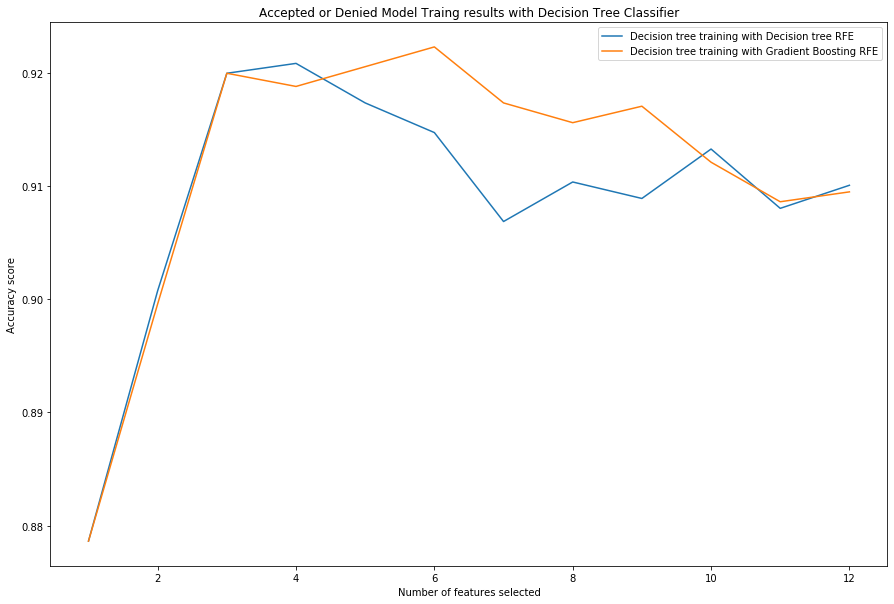

In [127]:
# line 1 points
# x1 = number_of_features
# y1 = accuracy_gradient_boost_gradient_boost_RFE
# # plotting the line 1 points 
# plt.plot(x1, y1, label = "Gradient boosting training with gradient boosting RFE")

# # line 2 points
# x2 = number_of_features
# y2 = accuracy_random_forest_gradient_boost_RFE
# # plotting the line 1 points 
# plt.plot(x2, y2, label = "Random forest training with gradient boosting RFE")


# # line 3 points
# x3 = number_of_features
# y3 = accuracy_random_forest_random_forest_RFE
# # plotting the line 2 points 
# plt.plot(x3, y3, label = "Random forest training with Random forest RFE")
fig = plt.figure(figsize=(15,10))
# line 4 points
x4 = number_of_features
y4 = accuracy_decision_tree_decision_tree_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Decision tree RFE")

# line 5 points
x4 = number_of_features
y4 = accuracy_decision_tree_gradient_boosting_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Gradient Boosting RFE")

plt.xlabel('Number of features selected')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy score')
# Set a title of the current axes.
plt.title('Accepted or Denied Model Traing results with Decision Tree Classifier')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
fig.savefig("decisiontree-results.png")

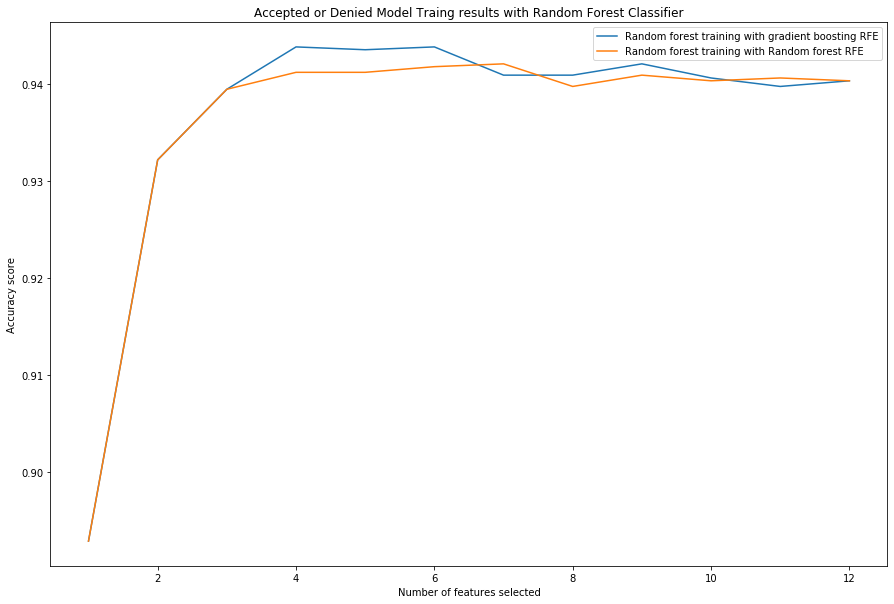

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

# # line 1 points
# x1 = number_of_features
# y1 = accuracy_gradient_boost_gradient_boost_RFE
# # plotting the line 1 points 
# plt.plot(x1, y1, label = "Gradient boosting training with gradient boosting RFE")

# line 2 points
x2 = number_of_features
y2 = accuracy_random_forest_gradient_boost_RFE
# plotting the line 1 points 
plt.plot(x2, y2, label = "Random forest training with gradient boosting RFE")


# line 3 points
x3 = number_of_features
y3 = accuracy_random_forest_random_forest_RFE
# plotting the line 2 points 
plt.plot(x3, y3, label = "Random forest training with Random forest RFE")

# # line 4 points
# x4 = number_of_features
# y4 = accuracy_decision_tree_decision_tree_RFE
# # plotting the line 2 points 
# plt.plot(x4, y4, label = "Decision tree training with Decision tree RFE")

# # line 5 points
# x4 = number_of_features
# y4 = accuracy_decision_tree_gradient_boosting_RFE
# # plotting the line 2 points 
# plt.plot(x4, y4, label = "Decision tree training with Gradient Boosting RFE")

plt.xlabel('Number of features selected')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy score')
# Set a title of the current axes.
plt.title('Accepted or Denied Model Traing results with Random Forest Classifier')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
fig.savefig("random-forest-results.png")

In [129]:
# for index in range(1, 16):
#     decisionTreeRFELoop = RFE(tree.DecisionTreeClassifier(max_depth = 5),n_features_to_select = index)
#     decisionTreeRFELoop.fit(X_train,y_train)
#     X_train_dec_RFELoop = decisionTreeRFELoop.transform(X_train)
#     X_test_dec_RFELoop = decisionTreeRFELoop.transform(X_test)
#     print("number of selected features:", index)
#     run_randomForest(X_train_dec_RFELoop, X_test_dec_RFELoop, y_train, y_test)
#     print()

In [130]:
# for index in range(1, 16):
#     randomForestRFELoop = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),n_features_to_select = index)
#     randomForestRFELoop.fit(X_train,y_train)
#     X_train_Rand_RFELoop = randomForestRFELoop.transform(X_train)
#     X_test_Rand_RFELoop = randomForestRFELoop.transform(X_test)
#     print("selected features:", index)
#     run_decisionTree(X_train_Rand_RFELoop, X_test_Rand_RFELoop, y_train, y_test)
#     print()

In [131]:
gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = 4)
gradientBoostRFELoop.fit(X_train,y_train)
X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
X_test_Grad_RFELoop = gradientBoostRFELoop.transform(X_test)
print("number of selected features:", 4)
accuracy_random_forest_gradient_boost_RFE[3] = run_randomForest(X_train_Grad_RFELoop, X_test_Grad_RFELoop, y_train, y_test)
print()

number of selected features: 4
Accuracy:  0.9438300349243306
Classification report:                precision    recall  f1-score   support

           0       0.82      0.52      0.64       325
           1       0.95      0.99      0.97      3111

    accuracy                           0.94      3436
   macro avg       0.88      0.76      0.80      3436
weighted avg       0.94      0.94      0.94      3436




In [132]:
def run_randomForest_save_data(X_train, X_test, y_train):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    pd.DataFrame(y_pred, columns=['prediction']).to_csv('prediction.csv')

In [133]:
X_submit_raw = pd.read_csv("test.csv", parse_dates=['pickup_time', 'drop_time'])
X_submit_raw['pickup_time_only'] = X_submit_raw['pickup_time'].dt.time
X_submit_raw['drop_time_only'] = X_submit_raw['drop_time'].dt.time
lb_label = LabelEncoder()
X_submit_raw["pickup_time_only_code"] = lb_label.fit_transform(X_submit_raw["pickup_time_only"])
X_submit_raw["drop_time_only_code"] = lb_label.fit_transform(X_submit_raw["drop_time_only"])
X_submit_raw[["pickup_time_only", "pickup_time_only_code", "drop_time_only", "drop_time_only_code"]].head(11)
X_submit = X_submit_raw.drop(['tripid', 'pickup_time', 'pickup_time_only', 'drop_time_only', 'drop_time'], axis=1)
X_submit.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_only_code,drop_time_only_code
0,10.5,924,42,2.4486,148,6.83454,79.8750,6.77490,79.8840,289.27,28,46
1,10.5,4249,20,0.0000,91,6.91168,79.8723,6.55091,79.9706,1912.70,45,89
2,10.5,1552,255,2.6588,23,6.92145,79.8478,6.90539,79.8989,394.00,137,170
3,10.5,462,16,0.0000,198,6.77433,79.9416,6.80401,79.9407,154.32,150,175
4,10.5,814,392,12.3692,69,6.97968,79.9130,6.98875,79.8914,147.47,225,252


In [136]:
gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = 4)
gradientBoostRFELoop.fit(X_train,y_train)
X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
X_submit_Grad_RFELoop = gradientBoostRFELoop.transform(X_submit)
print("number of selected features:", 4)
run_randomForest_save_data(X_train_Grad_RFELoop, X_submit_Grad_RFELoop, y_train)
print()

number of selected features: 4

